In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import utils 
import numpy as np
import pandas as pd
import os
import sys
import numpy as np
import tkinter
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import pickle
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.set_option('display.max_colwidth', -1)
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir, 'dataset')
train = pd.read_csv(os.path.join(data_dir,'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

test_x, _ = utils.featurize(test, stage='test')


train_x, train_y = utils.featurize(train)
print(test_x[0:10])

[[0.         0.         0.         0.01388889 0.         0.
  0.05555556 0.05555556 0.         0.         0.01388889 0.
  0.         0.         0.01388889 0.         0.         0.
  0.02777778 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.53846154 0.         0.         0.         0.07692308 0.
  0.15384615 0.         0.07692308 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.25       0.3125     0.         0.         0.         0.
  0.25       0.3125     0.         0.3125     0.3125     0.3125
  0.3125     0.3125     0.3125    ]
 [0.         0.         0.         0.         0.         0.
  0.10526316 0.         0.         0.         0.02631579 0.
  0.         0.         0.15789474 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.14285714 0.         0.         0.         0.         0.
  0.        

In [4]:
len(train)

159571

In [6]:
def get_proba(clf,x):
    a = []
    for v in clf.predict_proba(x.reshape(1,-1)):
        a.append([v[0,1]])
       
    return a

def column(matrix, i):
    return [row[i] for row in matrix]


In [22]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
cv_results = cross_validate(tree,train_x,train_y,cv=5,return_estimator=True,return_train_score=False)
np.mean(cv_results['test_score'])

0.905979162568257

In [7]:
print(cv_results['test_score'])
clf=cv_results["estimator"][0]

# print(np.shape(clf.predict_proba(train_x[6].reshape(1, -1))))
# clf.predict_proba(train_x[6].reshape(1, -1))[3][0][1]
f = open("decision_tree.csv","w")
k = 0
for feat in test_x:
    prob = get_proba(clf,feat)
    f.write(str(test.values[k][0]) + "," +",".join(str(x[0]) for x in prob))
    f.write("\n")
    k+=1
f.close()

[0.90202099 0.90524535 0.90646738 0.90477533 0.90606004]


In [26]:
np.sum(train_y,axis=0)


array([15294,  1595,  8449,   478,  7877,  1405])

In [7]:
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4)
rf_cv_results=cross_validate(rf,train_x,train_y,cv=5,return_estimator=True,return_train_score=False)
print(rf_cv_results['test_score'])

[0.90722231 0.90919346 0.91063483 0.91082284 0.91029015]


In [7]:
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4)
rf_cv_results=cross_validate(rf,train_x,train_y,cv=5,scoring='f1_macro',return_estimator=True,return_train_score=False)
print(rf_cv_results['test_score'])

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.32326269 0.32517514 0.32870057 0.32513946 0.32769304]


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
rf_cv_results.keys()

dict_keys(['score_time', 'estimator', 'fit_time', 'test_score'])

In [29]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

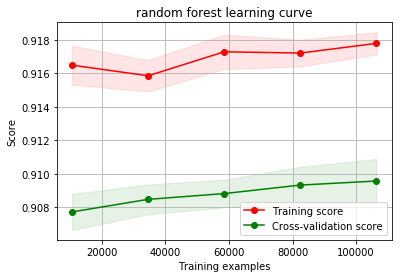

0.9097956533288963

In [32]:

plot_learning_curve(rf,"random forest learning curve",train_x,train_y)
plt.show()
np.mean(rf_cv_results['test_score'])

In [8]:

idx = 0
count = 0
while(count<50):
    a = rf_cv_results['estimator'][4].predict(train_x[idx].reshape(1,-1))
    if(not (a.astype(int)==train_y[idx]).all()):
        print("predicted: ",end="")
        print(a.astype(int))
        print("expected: ",end="")
        print(train_y[idx])
        print(train.values[idx][1])
        print(train_x[idx])
        count+=1
    idx+=1

predicted: [[1 0 1 0 1 0]]
expected: [1 1 1 0 1 0]
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
[0.    0.    0.    0.    0.    0.    4.625 0.25  0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
predicted: [[0 0 0 0 0 0]]
expected: [1 0 0 0 0 0]
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
[0.   0.   0.   0.   0.   0.   0.86 0.   0.   0.   0.02 0.   0.08 0.
 0.   0.   0.   0.   0.   0.   0.  ]
predicted: [[0 0 0 0 0 0]]
expected: [1 0 0 0 0 0]
Bye! 

Don't look, come or think of comming back! Tosser.
[0.  0.  0.  0.  0.  0.  0.3 0.  0.2 0.  0.1 0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0. ]
predicted: [[1 0 0 0 0 0]]
expected: [1 0 1 0 1 1]
You are gay or antisemmitian? 

Archangel WHite Tiger



predicted: [[1 0 1 0 1 0]]
expected: [1 1 1 0 1 0]
you are a stupid fuck 

and your mother's cunt stinks
[0.  0.1 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.1 0.  0. ]
predicted: [[1 0 1 0 0 0]]
expected: [1 0 1 0 1 1]
Kill all niggers. 

I have hard, that others have said this.. should this be included? That racists sometimes say these.
[0.   0.   0.   0.   0.   0.   0.15 0.05 0.   0.   0.05 0.   0.1  0.
 0.   0.   0.   0.   0.   0.   0.  ]
predicted: [[1 0 0 0 0 0]]
expected: [0 0 0 0 0 0]
Well I will use my user page then, don't tell meyour gonna remove it too, because that will piss me off and drive me nuts. Also I am not making a personal ttack on Jimmy wales, I am saying he is a bit to greedy dont you think? He's got 6 million dollars already and now he's asking for more.
[0.         0.         0.         0.         0.         0.
 0.11666667 0.01666667 0.         0.         0.05       0.
 0.         0.01666667 0.         0.         0.         0.
 0.        

In [ ]:
ran_f = RandomForestClassifier()
parameters = {'n_estimators':[300,400,500,600,700],'min_samples_leaf': [4, 8, 10],'criterion': ['gini', 'entropy']}
rfs = GridSearchCV(ran_f, parameters, cv=5)
rfs.fit(train_x,train_y)

In [14]:
rfs.cv_results_

{'mean_fit_time': array([139.49301476, 183.4048697 , 216.53961377, 254.49498482,
        292.28981099, 117.83096762, 157.21645169, 195.81741047,
        245.992558  , 270.15040126, 113.42047105, 153.15201044,
        188.70641985, 229.07230639, 270.33021464, 159.84373984,
        213.80976849, 265.40656219, 316.66983218, 368.71965418,
        149.28168707, 199.56126842, 248.52116828, 303.34603605,
        372.69907465, 158.71623244, 211.16108875, 261.90978212,
        293.78175302, 342.21890721]),
 'mean_score_time': array([4.13468742, 5.52610269, 6.81144938, 8.4307889 , 9.59236431,
        3.9394989 , 5.24314942, 6.56454639, 7.97624359, 9.19871073,
        3.86701045, 5.25098157, 6.44697599, 7.77066789, 9.08452568,
        3.98445449, 5.27895036, 6.600809  , 7.98061357, 9.26132555,
        3.82501984, 5.12159362, 6.39070044, 7.69368873, 8.95484424,
        3.84083858, 5.09334893, 6.4804215 , 7.60905185, 8.84001923]),
 'mean_test_score': array([0.9096327 , 0.90964524, 0.9096891 , 0.909

In [20]:

feature_names = ["ignore 0","# sexual organ","# violent words","family words","# negative adj","ignored this","# CAPS","# swears","# !","# complimentary words","# commas","None","# newlines","# disability","# racial slurs","# ethics slurs","# archaic","# class","# gender","# religion","# nationality"]
class_names = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
export_graphviz(rfs.best_estimator_[250],out_file='tree.dot',feature_names=feature_names,class_names=class_names, rounded=True,proportion=False,precision=2,filled=True)


PermissionError: [Errno 13] Permission denied

In [13]:
rf_clf = rfs.best_estimator_#rf_cv_results['estimator'][0]
k=0
ran_f = open("random_forest2.csv","w")
for feat in test_x:
    prob = get_proba(rf_clf,feat)
    ran_f.write(str(test.values[k][0]) + "," +",".join(str(x[0]) for x in prob))
    ran_f.write("\n")
    k+=1
ran_f.close()

In [14]:
lr = []
lr.append(LogisticRegression())
lr.append(LogisticRegression())
lr.append(LogisticRegression())
lr.append(LogisticRegression())
lr.append(LogisticRegression())
lr.append(LogisticRegression())
lr_cv_results = []
i=0
while(i<6):
    
    lr_cv_result = cross_validate(lr[i],train_x,column(train_y,i),cv=5,return_estimator=True,return_train_score=False)
    print(lr_cv_result['test_score'])
    lr_cv_results.append(lr_cv_result)
    i+=1

[0.93990287 0.94018487 0.94077834 0.93996365 0.9398991 ]
[0.99006737 0.99050573 0.98972238 0.99016106 0.99041173]
[0.96371612 0.96343412 0.96374632 0.96506236 0.96289913]
[0.99696068 0.99696068 0.99689801 0.99699182 0.99699182]
[0.95484882 0.95710481 0.95757348 0.95431472 0.95456397]
[0.99128936 0.99122642 0.99113242 0.99106975 0.99122642]


In [20]:
np.mean([0.9399,0.99,0.9637,0.9969,0.9548,0.9912])

0.97275

In [8]:
def lr_get_proba(clf,x):
    a = []
    for i in clf:
        
        for v in i.predict_proba(x.reshape(1,-1)):
            a.append(v[1])
       
    return a



In [38]:
lr_clfs = []
lr_clfs.append(lr_cv_results[0]['estimator'][0])
lr_clfs.append(lr_cv_results[1]['estimator'][0])
lr_clfs.append(lr_cv_results[2]['estimator'][0])
lr_clfs.append(lr_cv_results[3]['estimator'][0])
lr_clfs.append(lr_cv_results[4]['estimator'][0])
lr_clfs.append(lr_cv_results[5]['estimator'][0])

",".join(str(x) for x in lr_get_proba(lr_clfs,test_x[1]))

'0.06196153295436414,0.010201813287534878,0.03273787179065023,0.004423638436312418,0.04763677331523011,0.01071707247351741'

In [39]:
k=0
lr_f = open("logistic_regression.csv","w")
for feat in test_x:
    prob = lr_get_proba(lr_clfs,feat)
    lr_f.write(str(test.values[k][0]) + "," +",".join(str(x) for x in prob))
    lr_f.write("\n")
    k+=1
lr_f.close()

In [16]:
svc = []
svc.append(svm.SVC(probability=True))
svc.append(svm.SVC(probability=True))
svc.append(svm.SVC(probability=True))
svc.append(svm.SVC(probability=True))
svc.append(svm.SVC(probability=True))
svc.append(svm.SVC(probability=True))
svc_cv_results = []
j=0
while(j<6):
    svc_cv_result = cross_validate(svc[j],train_x,column(train_y,j),cv=3,return_estimator=True,return_train_score=False)
    print(svc_cv_result['test_score'])
    svc_cv_results.append(svc_cv_result)
    j+=1

[0.94113666 0.94164317 0.94070314]
[0.99003591 0.99005471 0.99007314]
[0.97283375 0.97407407 0.97382967]
[0.99699197 0.99701072 0.99701072]
[0.96350886 0.96474968 0.96356389]
[0.99133312 0.99133296 0.99142696]


In [21]:
np.mean([0.9411,0.9900,0.9728,0.9969,0.9635,0.9913])

0.9759333333333333

In [17]:
svc_clfs = []
svc_clfs.append(svc_cv_results[0]['estimator'][0])
svc_clfs.append(svc_cv_results[1]['estimator'][0])
svc_clfs.append(svc_cv_results[2]['estimator'][0])
svc_clfs.append(svc_cv_results[3]['estimator'][0])
svc_clfs.append(svc_cv_results[4]['estimator'][0])
svc_clfs.append(svc_cv_results[5]['estimator'][0])

count = 0
for classifier in svc_clfs:
    with open("svc"+str(count)+".pickle","wb") as f:
        pickle.dump(classifier,f)
    count+=1
",".join(str(x) for x in lr_get_proba(svc_clfs,test_x[1]))

'0.054940068937689636,0.009839087747827628,0.019901577256955728,0.0031495311437181855,0.02683736324712405,0.008556809949554831'

In [18]:
k=0
lr_f = open("support_vector_machine.csv","w")
for feat in test_x:
    prob = lr_get_proba(svc_clfs,feat)
    lr_f.write(str(test.values[k][0]) + "," +",".join(str(x) for x in prob))
    lr_f.write("\n")
    k+=1
lr_f.close()

In [10]:
# when ready, set this to the best model you found, trained on the test data:
best_classifier = None

with open('classifier.pickle', 'wb') as f: # 'wb' stands for 'write bytes'
    pickle.dump(best_classifier, f)

In [49]:
from sklearn.model_selection import train_test_split
#split the sample into 70/30, 70% as training and 30% as test
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.3, random_state=0)


In [50]:
print(len(y_test))
np.sum(y_test,axis=0)

47872


array([4591,  485, 2527,  131, 2362,  430])

In [74]:
from sklearn.metrics import accuracy_score
def average_accuracy(clf):
    a = []
    c = []
    for x in range(len(X_test)):
        
        pred = clf.predict(X_test[x].reshape(1,-1))
        b = [1 if pred[0][y]==y_test[x][y] else 0 for y in range(6)]
        c.append(accuracy_score(y_test[x],pred[0]))
        
        a.append(b)
    print(np.mean(c))
    return [k/len(y_test) for k in np.sum(a,axis=0)]

In [75]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
tree.fit(X_train,y_train)

print(accuracy_score(y_test,tree.predict(X_test)))
average_accuracy(tree)

0.9050593248663101
0.9720992090017826


[0.9280790441176471,
 0.9898688168449198,
 0.9655539772727273,
 0.9972635360962567,
 0.9608121657754011,
 0.9910177139037433]

In [60]:
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4)
rf.fit(X_train,y_train)

average_accuracy(rf)

47872


[0.9422418114973262,
 0.9898688168449198,
 0.9733873663101604,
 0.9972635360962567,
 0.9635904077540107,
 0.9911639371657754]

In [64]:
print(rf.score(X_test,y_test))
print(tree.score(X_test,y_test))

0.9086522393048129
0.9050593248663101


In [95]:
def lr_average_accuracy(clf,i):
    a = []
    c = []
    for x in range(len(X_test)):
        
        pred = clf.predict(X_test[x].reshape(1,-1))
        
        b = [1 if pred[0]==y_test[x][i] else 0 ]
        
        
        a.append(b)
    
    return [k/len(y_test) for k in np.sum(a,axis=0)]

In [96]:
lr = []
lr.append(LogisticRegression().fit(X_train,column(y_train,0)))
lr.append(LogisticRegression().fit(X_train,column(y_train,1)))
lr.append(LogisticRegression().fit(X_train,column(y_train,2)))
lr.append(LogisticRegression().fit(X_train,column(y_train,3)))
lr.append(LogisticRegression().fit(X_train,column(y_train,4)))
lr.append(LogisticRegression().fit(X_train,column(y_train,5)))

In [112]:

lr_performance= [lr_average_accuracy(lr[x],x) for x in range(6)]
print(lr_performance)

[[0.9323404077540107], [0.9886363636363636], [0.965386864973262], [0.9972217580213903], [0.9596632687165776], [0.9907670454545454]]


In [100]:
svc = []
svc.append(svm.SVC(probability=False).fit(X_train,column(y_train,0)))
svc.append(svm.SVC(probability=False).fit(X_train,column(y_train,1)))
svc.append(svm.SVC(probability=False).fit(X_train,column(y_train,2)))
svc.append(svm.SVC(probability=False).fit(X_train,column(y_train,3)))
svc.append(svm.SVC(probability=False).fit(X_train,column(y_train,4)))
svc.append(svm.SVC(probability=False).fit(X_train,column(y_train,5)))

print(svc[0].score(X_test,column(y_test,0)))

svc_performance= [lr_average_accuracy(svc[x],x) for x in range(6)]
print(svc_performance)

0.928747493315508
[[0.928747493315508], [0.9898688168449198], [0.9643841911764706], [0.9972635360962567], [0.9582637032085561], [0.9910177139037433]]


In [105]:
sample_percentage= [x/len(y_test) for x in np.sum(y_test,axis=0)]
print(sample_percentage)

[0.09590157085561497, 0.010131183155080214, 0.05278659759358289, 0.0027364639037433156, 0.0493399064171123, 0.008982286096256684]


In [107]:
print(len(y_train))
print(np.sum(y_train,axis=0))
train_sample_percentage= [x/len(y_train) for x in np.sum(y_train,axis=0)]
print(train_sample_percentage)

111699
[10703  1110  5922   347  5515   975]
[0.09582001629378956, 0.009937421104933796, 0.05301748448956571, 0.0031065631742450694, 0.04937376341775665, 0.00872881583541482]


In [111]:
a= [0.9422418114973262,
 0.9898688168449198,
 0.9733873663101604,
 0.9972635360962567,
 0.9635904077540107,
 0.9911639371657754]
[x[0]*100 for x in svc_performance]


[92.8747493315508,
 98.98688168449198,
 96.43841911764706,
 99.72635360962568,
 95.82637032085562,
 99.10177139037432]